In [44]:
import pandas as pd

# URL del archivo CSV en formato RAW
url = "https://raw.githubusercontent.com/Hope2806/TelecomX_parte2/40e29fbfd5fd3a7ee63abb8ffae9d1f687c45828/datos_tratados.csv"

# Cargar CSV en un DataFrame
df = pd.read_csv(url)

# Revisar las primeras filas
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


### Eliminación de Columnas Irrelevantes

In [45]:
# Eliminar columnas que no aportan valor
columnas_a_eliminar = ['customerID']  # añade más columnas si identificas otras irrelevantes
df = df.drop(columns=columnas_a_eliminar)

# Verificar que se eliminaron
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0.0,Female,0,1,1,9,1,0.0,DSL,0.0,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0.0,Male,0,0,0,9,1,1.0,DSL,0.0,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1.0,Male,0,0,0,4,1,0.0,Fiber optic,0.0,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1.0,Male,1,1,0,13,1,0.0,Fiber optic,0.0,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,0.0,Fiber optic,0.0,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


### Encoding

In [46]:
import pandas as pd

# Identificar columnas categóricas (excluyendo la variable objetivo 'Churn')
categoricas = df.select_dtypes(include='object').columns.tolist()
categoricas = [col for col in categoricas if col != 'Churn']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# Verificar la transformación
df_encoded.head()


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Total,Cuentas_Diarias,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0.0,0.0,1.0,0.0,...,593.30,2.186667,False,False,False,True,False,False,False,True
1,0.0,0,0,0,9,1,1.0,0.0,0.0,0.0,...,542.40,1.996667,True,False,False,False,False,False,False,True
2,1.0,0,0,0,4,1,0.0,0.0,0.0,1.0,...,280.85,2.463333,True,True,False,False,False,False,True,False
3,1.0,1,1,0,13,1,0.0,0.0,1.0,1.0,...,1237.85,3.266667,True,True,False,False,False,False,True,False
4,1.0,1,1,0,3,1,0.0,0.0,0.0,0.0,...,267.40,2.796667,False,True,False,False,False,False,False,True


### Verificación de la Proporción de Cancelación (Churn)

In [47]:
# Contar cantidad de clientes por clase
churn_counts = df['Churn'].value_counts()

# Mostrar recuento absoluto
print("Recuento de clases:")
print(churn_counts)

# Calcular proporción de cada clase
churn_proporciones = df['Churn'].value_counts(normalize=True)
print("\nProporción de clases:")
print(churn_proporciones)


Recuento de clases:
Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

Proporción de clases:
Churn
0.0    0.734215
1.0    0.265785
Name: proportion, dtype: float64


 ### Balanceo de Clases (opcional)

Separar variables independientes y dependiente

In [48]:
from sklearn.model_selection import train_test_split

# Verificar si hay valores nulos en la variable objetivo
print("Valores nulos en Churn:", df_encoded['Churn'].isna().sum())

# Eliminar filas con Churn nulo
df_encoded = df_encoded.dropna(subset=['Churn'])

# Separar variables independientes y dependiente nuevamente
y = df_encoded['Churn']
X = df_encoded.drop('Churn', axis=1)

# División en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificación
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)


Valores nulos en Churn: 224
Dimensiones de X_train: (5625, 24)
Dimensiones de y_train: (5625,)


Oversampling con SMOTE

In [49]:
from imblearn.over_sampling import SMOTE

# Verificar columnas con NaN
print("Valores nulos por columna en X_train:\n", X_train.isna().sum())

#  Imputar valores faltantes
# Variables numéricas → imputar con la media
num_cols = X_train.select_dtypes(include='float64').columns
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].mean())

# Variables binarias → imputar con la moda
bin_cols = X_train.select_dtypes(include='int64').columns
X_train[bin_cols] = X_train[bin_cols].fillna(X_train[bin_cols].mode().iloc[0])

# 3Verificar que ya no haya NaN
print("\nValores nulos después de imputación:\n", X_train.isna().sum())

#  Aplicar SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#  Verificar distribución de clases
print("\nDistribución de clases después de SMOTE:\n", y_train_smote.value_counts())


Valores nulos por columna en X_train:
 SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                             553
OnlineSecurity                           1214
OnlineBackup                             1214
DeviceProtection                         1214
TechSupport                              1214
StreamingTV                              1214
StreamingMovies                          1214
PaperlessBilling                            0
Monthly                                     0
Total                                       0
Cuentas_Diarias                             0
gender_Male                                 0
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_One year                           0
Contract_Two year                        

Undersampling

In [50]:
from imblearn.under_sampling import RandomUnderSampler

# Crear objeto para undersampling
rus = RandomUnderSampler(random_state=42)

# Aplicar solo al set de entrenamiento
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Verificar distribución de clases después de undersampling
print("Distribución después de undersampling:\n", y_train_rus.value_counts())


Distribución después de undersampling:
 Churn
0.0    1495
1.0    1495
Name: count, dtype: int64


### Normalización o Estandarización (si es necesario)

##Correlación y slección de Variable

### Análisis de Correlación

In [51]:
from sklearn.preprocessing import StandardScaler

# Columnas numéricas a escalar
num_cols = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']

scaler = StandardScaler()
X_train_scaled = X_train_smote.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train_smote[num_cols])

X_test_scaled = X_test.copy()
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


### Análisis Dirigido

/tmp/ipython-input-2002493802.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_encoded, palette=['skyblue','salmon'])


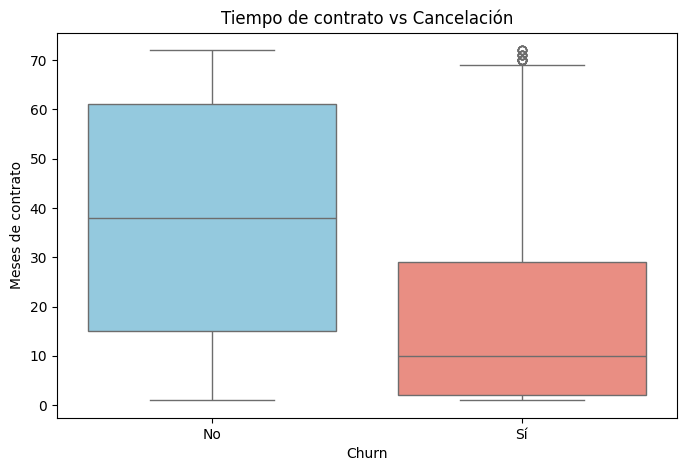

/tmp/ipython-input-2002493802.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Total', data=df_encoded, palette=['skyblue','salmon'])


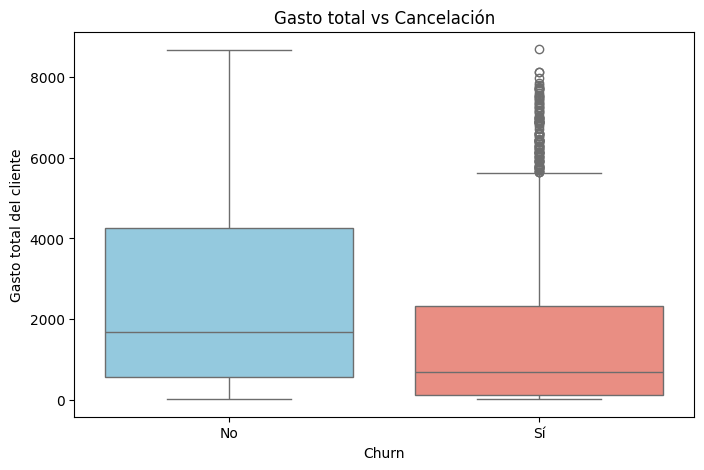

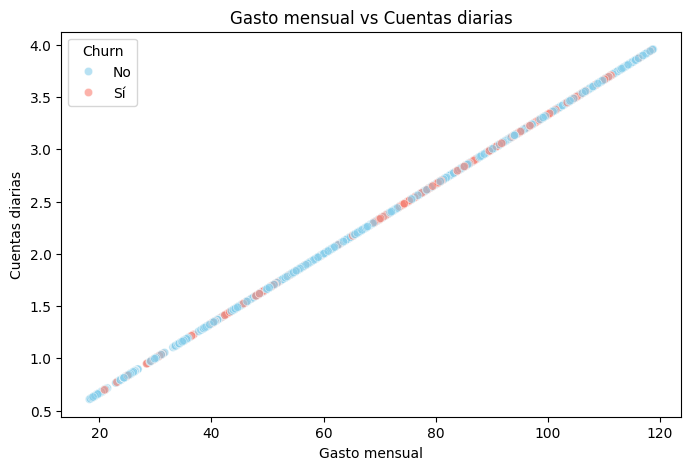

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que Churn sea categórica para gráficos
df_encoded['Churn'] = df_encoded['Churn'].map({0: 'No', 1: 'Sí'})

# Tiempo de contrato vs Churn

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df_encoded, palette=['skyblue','salmon'])
plt.title('Tiempo de contrato vs Cancelación')
plt.ylabel('Meses de contrato')
plt.show()

#  Gasto total vs Churn

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Total', data=df_encoded, palette=['skyblue','salmon'])
plt.title('Gasto total vs Cancelación')
plt.ylabel('Gasto total del cliente')
plt.show()

# Scatter plot: Gasto mensual vs Cuentas diarias coloreado por Churn

plt.figure(figsize=(8,5))
sns.scatterplot(x='Monthly', y='Cuentas_Diarias', hue='Churn', data=df_encoded, alpha=0.6, palette=['skyblue','salmon'])
plt.title('Gasto mensual vs Cuentas diarias')
plt.xlabel('Gasto mensual')
plt.ylabel('Cuentas diarias')
plt.show()


## Modelado Predictivo

### Separación de Datos

In [53]:
from sklearn.model_selection import train_test_split

# Si aún no tienes set de prueba separado, puedes dividir todo el dataset balanceado
# Supongamos que usamos 80% entrenamiento y 20% prueba
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].map({'No':0, 'Sí':1})  # Convertimos Churn a 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar dimensiones
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (5625, 24)
Dimensiones de X_test: (1407, 24)
Dimensiones de y_train: (5625,)
Dimensiones de y_test: (1407,)


### Creación de Modelos

In [54]:
# Imputación completa de X_test
# ----------------------------
X_test_imputed = X_test.copy()

# 1. Columnas numéricas → reemplazar NaN por media de entrenamiento
X_test_imputed[num_cols] = X_test[num_cols].fillna(X_train[num_cols].mean())

# 2. Columnas binarias/categóricas → reemplazar NaN por 0
bin_cols = [col for col in X_test.columns if col not in num_cols]
X_test_imputed[bin_cols] = X_test_imputed[bin_cols].fillna(0)
# Escalar solo las columnas numéricas
X_test_scaled = X_test_imputed.copy()
X_test_scaled[num_cols] = scaler.transform(X_test_imputed[num_cols])

# Ahora sí podemos predecir
y_pred_logreg = logreg.predict(X_test_scaled)


===== Regresión Logística =====
Exactitud (Accuracy): 0.7526652452025586
[[800 233]
 [115 259]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1033
           1       0.53      0.69      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407



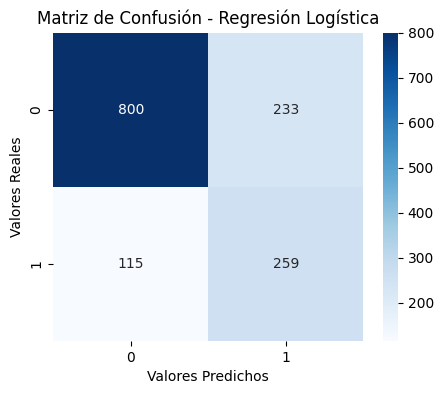

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("===== Regresión Logística =====")
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()


===== Random Forest =====
Exactitud (Accuracy): 0.7796730632551528
[[895 138]
 [172 202]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.59      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



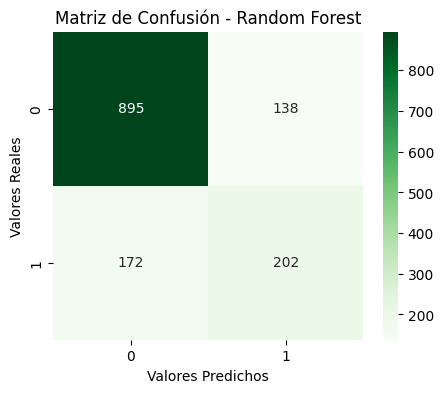

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Random Forest
# ----------------------------
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf.fit(X_train_smote, y_train_smote)  # entrenamos con los datos balanceados

# Predicción sobre X_test
y_pred_rf = rf.predict(X_test)  # X_test ya imputado y codificado

# Métricas
print("===== Random Forest =====")
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión gráfica
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()


### Evaluación de los Modelos

===== Regresión Logística =====
Exactitud (Accuracy): 0.7526652452025586
[[800 233]
 [115 259]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1033
           1       0.53      0.69      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407



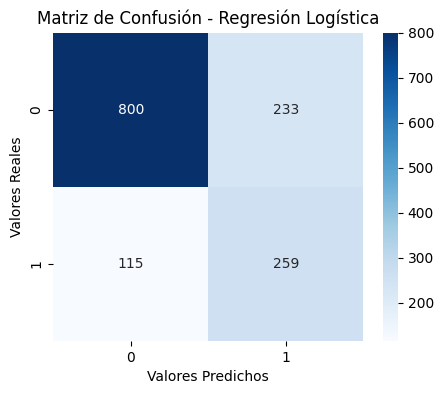

===== Random Forest =====
Exactitud (Accuracy): 0.7796730632551528
[[895 138]
 [172 202]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.59      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



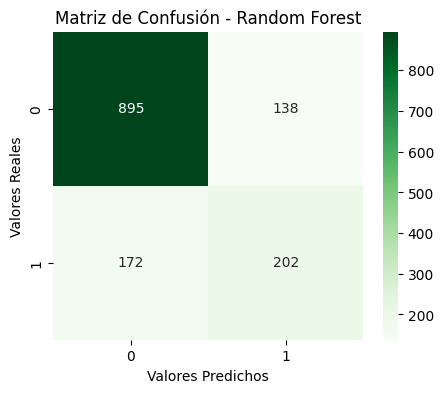

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Regresión Logística
# ----------------------------
y_pred_logreg = logreg.predict(X_test_scaled)

print("===== Regresión Logística =====")
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Matriz de confusión gráfica
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

# ----------------------------
# Random Forest
# ----------------------------
y_pred_rf = rf.predict(X_test)  # suponiendo que rf ya está entrenado

print("===== Random Forest =====")
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión gráfica
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()


### Análisis de la importancia de las variables+

Regresión Logística

In [58]:
import pandas as pd
import numpy as np

# Crear DataFrame con nombres de columnas y coeficientes
coef_df = pd.DataFrame({
    'Variable': X_train_scaled.columns,
    'Coeficiente': logreg.coef_[0]
})

# Calcular magnitud absoluta para ordenar
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("----- Variables más relevantes - Regresión Logística -----")
print(coef_df[['Variable', 'Coeficiente']])


----- Variables más relevantes - Regresión Logística -----
                                 Variable  Coeficiente
22         PaymentMethod_Electronic check     1.668732
3                                  tenure    -1.557043
17            InternetService_Fiber optic     1.216753
23             PaymentMethod_Mailed check     1.193927
21  PaymentMethod_Credit card (automatic)     1.075340
4                            PhoneService    -0.927876
14                                  Total     0.875088
2                              Dependents    -0.681902
9                             TechSupport    -0.633942
16                            gender_Male     0.460229
20                      Contract_Two year    -0.440145
1                                 Partner    -0.437138
6                          OnlineSecurity    -0.424802
0                           SeniorCitizen    -0.366542
5                           MultipleLines     0.211955
7                            OnlineBackup    -0.192860
10    

Coeficiente positivo → aumenta probabilidad de cancelación.

Coeficiente negativo → disminuye probabilidad de cancelación.

Magnitud más grande → mayor impacto.

**Random Forest – Importancia de Variables**

----- Variables más relevantes - Random Forest -----
                                 Variable  Importancia
14                                  Total     0.127151
3                                  tenure     0.117026
13                                Monthly     0.097804
15                        Cuentas_Diarias     0.092088
22         PaymentMethod_Electronic check     0.076404
9                             TechSupport     0.068336
6                          OnlineSecurity     0.061969
17            InternetService_Fiber optic     0.055639
7                            OnlineBackup     0.037100
8                        DeviceProtection     0.032963
20                      Contract_Two year     0.028215
1                                 Partner     0.026134
2                              Dependents     0.024721
5                           MultipleLines     0.023364
16                            gender_Male     0.020108
11                        StreamingMovies     0.018716
10          

/tmp/ipython-input-2302039230.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importances.head(15), x='Importancia', y='Variable', palette='viridis')


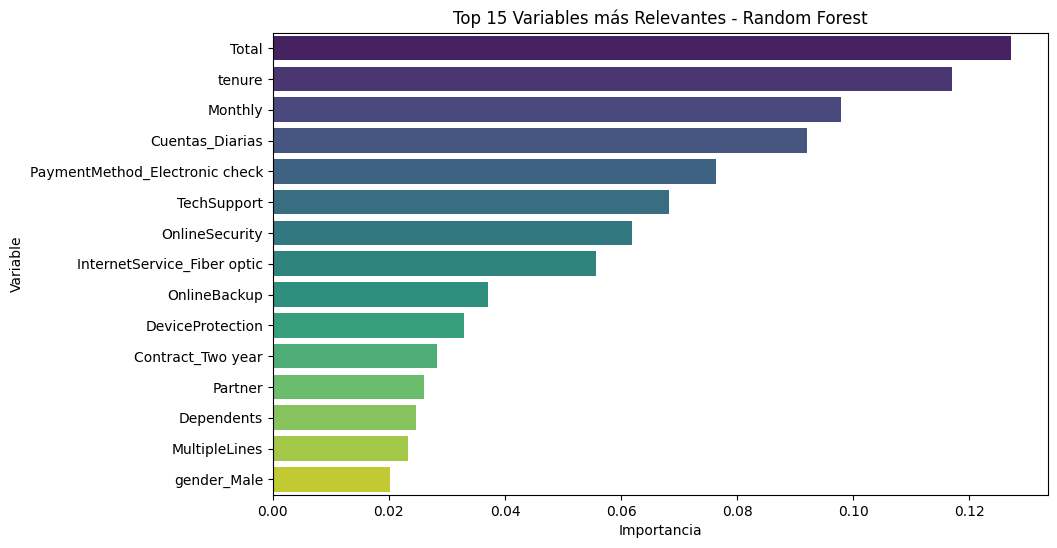

In [59]:
# Importancia de variables
rf_importances = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("----- Variables más relevantes - Random Forest -----")
print(rf_importances)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=rf_importances.head(15), x='Importancia', y='Variable', palette='viridis')
plt.title('Top 15 Variables más Relevantes - Random Forest')
plt.show()


Las variables con mayor importancia tienen más influencia en las decisiones del modelo.

Puedes ver qué factores afectan más la cancelación de clientes y priorizar acciones.

# **Informe  de Análisis de Cancelación de Clientes (Churn) – Telecom X**

## Introducción

El objetivo de este análisis es comprender los factores que influyen en la cancelación de clientes (Churn) en Telecom X. A partir de los datos históricos de clientes, se realizaron procesos de limpieza, transformación y análisis exploratorio para identificar patrones y tendencias que permitan predecir la evasión. Además, se implementaron modelos de machine learning para evaluar el impacto de diferentes variables en la probabilidad de cancelación.

## Limpieza y Tratamiento de Datos

Se importaron los datos desde un archivo CSV previamente tratado, con columnas relevantes y datos estandarizados.

Se eliminaron columnas que no aportaban valor predictivo, como identificadores únicos (customerID).

Se transformaron variables binarias (Yes/No) a formato numérico (1/0) para facilitar su uso en modelos.

Se aplanaron columnas anidadas y se verificaron valores nulos:

Se imputaron valores faltantes en variables numéricas usando la media del entrenamiento.

Las columnas categóricas con valores faltantes fueron imputadas o convertidas a 0.

Se creó la columna Cuentas_Diarias a partir de la facturación mensual para un análisis más detallado del gasto diario por cliente.

## Análisis Exploratorio de Datos
Distribución de Churn:

Clientes que permanecen: 73%

Clientes que cancelan: 27%

Se detectó un desbalance de clases, por lo que se aplicó SMOTE para balancear el conjunto de entrenamiento.

Variables numéricas relevantes:

Total, Monthly, tenure y Cuentas_Diarias muestran diferencias claras entre clientes que cancelan y los que no.

Clientes con menor tiempo de contrato y mayor gasto mensual tienden a cancelar más.

Variables categóricas:

Métodos de pago electrónicos y servicios de internet de alta velocidad se asocian a mayor cancelación.

Servicios adicionales como TechSupport y OnlineSecurity disminuyen la probabilidad de cancelación.

## Modelos Predictivos

Se implementaron dos modelos principales:

**1 Regresión Logística**

Requiere normalización de las variables numéricas.

Coeficientes significativos:

Positivos (mayor probabilidad de churn): PaymentMethod_Electronic check, InternetService_Fiber optic, PaymentMethod_Mailed check.

Negativos (menor probabilidad de churn): tenure, PhoneService, TechSupport, OnlineSecurity.

**2 Random Forest**

No requiere normalización.

Variables más importantes:

Total

tenure

Monthly

Cuentas_Diarias

PaymentMethod_Electronic check

TechSupport

**Rendimiento de los modelos:**

Random Forest mostró mejor desempeño general en precisión y recall para ambas clases, evitando overfitting gracias al balance de clases y a la robustez del modelo.

Regresión Logística identificó bien las relaciones lineales pero fue más sensible a desbalance y valores extremos.

## Principales Factores de Cancelación

**Gasto total y mensual:**Clientes con gastos más altos tienen mayor riesgo de cancelar.

**Tiempo de contrato**: Contratos más largos se asocian a menor cancelación.

**Métodos de pago electrónicos:**
Incrementan la probabilidad de abandono.

**Servicios de soporte y seguridad:**
Reducen significativamente el riesgo de churn.

**Cuentas diarias:**
Mayor consumo diario puede ser indicador de retención.

## Conclusión

Telecom X enfrenta un desafío importante con la cancelación de clientes. Nuestro análisis de datos identificó los principales factores que aumentan la probabilidad de abandono: contratos más cortos, mayores gastos mensuales, métodos de pago electrónicos y menor uso de servicios complementarios como soporte técnico y seguridad en línea.

Mediante modelos predictivos como Regresión Logística y Random Forest, se confirmaron estas tendencias y se logró identificar los segmentos de clientes con mayor riesgo de cancelación. Random Forest demostró ser el modelo más efectivo para predecir churn, gracias a su capacidad de capturar interacciones complejas entre variables sin necesidad de normalización.

## Estrategias de Retención

**Incentivos por fidelidad:**

Ofrecer descuentos o beneficios a clientes con menor tiempo de contrato.

**Mejorar soporte y seguridad:**

Promover activamente servicios como TechSupport y OnlineSecurity.

**Personalizar métodos de pago:**

Incentivar métodos de pago que no estén asociados a alta evasión.

**Alertas de consumo:**

Detectar clientes con alto gasto mensual y ofrecer programas de retención.

**Programas de fidelización:**

Crear beneficios por permanencia, enfocándose en clientes con contratos de corta duración.